# Face Recognition
This is the final project code of CS308 Computer Vision. Write by group Zhang Zhentao.
This jupyter notebook contains main function of deepface, e.g. match images in database with input image, analyze a face with output of his/her age, gender, race, emotions, etc.

In [26]:
%matplotlib inline
from deepface import DeepFace
import matplotlib.pyplot as plt
import os
models = ["VGG-Face", "Facenet", "OpenFace", "DeepID", "ArcFace"]
model_name = models[0]
metrics_avail = ["cosine", "euclidean"]
metrics = metrics_avail[0]
lib_path = './VGG-Face2/train'
test_class = 12
test_path = f'./VGG-Face2/test/{test_class}/'

Match input image with existing image database.

In [27]:
def find():
    cur_path = os.getcwd()
    print(cur_path)
    fig_name = os.listdir(test_path)[0]
    res = DeepFace.find(img_path=test_path+fig_name, db_path=lib_path, model_name= model_name, distance_metric=metrics, enforce_detection= False)
    print(res[0].to_numpy()[0][0], res[0].to_numpy()[0][5])
    print(len(res[0]))
    original_img = plt.imread(test_path+fig_name)
    plt.subplot(2, 2, 1)
    plt.imshow(original_img)
    plt.title('origin image')
    plt.axis('off')
    
    for i in range(3):
        if(i >= len(res[0])):
            break
        img = plt.imread(res[0].to_numpy()[i][0])
        plt.subplot(2, 2, i+2)
        plt.imshow(img)
        if i == 0:
            plt.title('Best Find Image')
        else:
            plt.title(f'No.{i+1} Fit Image')
        plt.axis('off')
    
    
    
    

Analyze a face with output of his/her age, gender, race, emotions, etc. You can set the parameter of "actions" in *DeepFace.analyze()* method to select which metrics do you want to analyze.

In [28]:
def detect():
    #num = 61
    fig_name = os.listdir(test_path)[0]
    res = DeepFace.analyze(img_path= test_path+fig_name, actions= ['age' , 'emotion', 'race'], enforce_detection=False)
    print(res)

/mnt/e/Face-Recognition
There are  2028  representations found in  representations_vgg_face.pkl
find function lasts  1.9402883052825928  seconds
/mnt/e/Face-Recognition/VGG-Face2/train/12/0320_01.jpg 0.14107499271678126
363


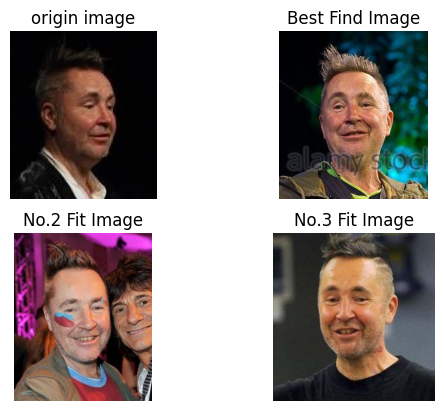

In [29]:
if __name__ == '__main__':
    find()